In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Rescaling
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [50]:
df = pd.read_csv("C:\\Users\\Abhay\\OneDrive\\Desktop\\character_recognition\\A_Z Handwritten Data.csv").astype('float32')

In [51]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X = df.drop('0', axis = 1)
Y = df['0']
X = X.to_numpy()
Y = Y.to_numpy().reshape(-1,1)

In [53]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [54]:
print(f"Train_shape: {x_train.shape}")
print(f"Val_shape: {x_val.shape}")
print(f"Test_shape: {x_test.shape}")

Train_shape: (238368, 784)
Val_shape: (59592, 784)
Test_shape: (74490, 784)


In [55]:
print(y_train.shape)
print(y_test.shape)

(238368, 1)
(74490, 1)


In [56]:
labels = {}
for i in range(26):
    labels[i] = chr(i+65)


In [60]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

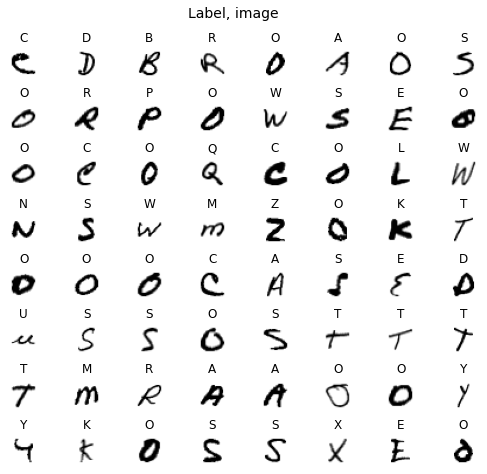

In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = x_train.shape
fig, axes = plt.subplots(8,8, figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    x_random_reshaped = x_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(x_random_reshaped, cmap='binary')
    
    # Display the label above the image
    ax.set_title(labels[y_train[random_index, 0]])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [62]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Rescaling(scale=1./255),
        Dense(units=208, activation="relu", name="L1"),
        Dense(units=104, activation="relu", name="L2"),
        Dense(units=52, activation="relu", name="L3"),
        Dense(units=26, activation="softmax", name="L4") 
    ], name = "my_model" 
)

In [63]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 208)               163280    
                                                                 
 L2 (Dense)                  (None, 104)               21736     
                                                                 
 L3 (Dense)                  (None, 52)                5460      
                                                                 
 L4 (Dense)                  (None, 26)                1378      
                                                                 
Total params: 191,854
Trainable params: 191,854
Non-trainable params: 0
_________________________________________________________________


In [68]:
[layer1, layer2, layer3, layer4, layer5] = model.layers

In [71]:

W1,b1 = layer2.get_weights()
W2,b2 = layer3.get_weights()
W3,b3 = layer4.get_weights()
W4,b4 = layer5.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (784, 208), b1 shape = (208,)
W2 shape = (208, 104), b2 shape = (104,)
W3 shape = (104, 52), b3 shape = (52,)
W4 shape = (52, 26), b4 shape = (26,)


In [72]:
# Adam optimizer is used. 
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics = [
        tf.keras.metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy", dtype=None)
    ],
)

history = model.fit(
    x_train,y_train,
    epochs=5,
    validation_data=(x_val, y_val),
)

Epoch 1/5
7449/7449 [==============================] - 23s 3ms/step - loss: 0.2546 - sparse_categorical_accuracy: 0.9275 - val_loss: 0.1337 - val_sparse_categorical_accuracy: 0.9613
Epoch 2/5
7449/7449 [==============================] - 21s 3ms/step - loss: 0.1177 - sparse_categorical_accuracy: 0.9660 - val_loss: 0.1220 - val_sparse_categorical_accuracy: 0.9628
Epoch 3/5
7449/7449 [==============================] - 21s 3ms/step - loss: 0.0897 - sparse_categorical_accuracy: 0.9738 - val_loss: 0.0927 - val_sparse_categorical_accuracy: 0.9729
Epoch 4/5
7449/7449 [==============================] - 22s 3ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.0879 - val_sparse_categorical_accuracy: 0.9754
Epoch 5/5
7449/7449 [==============================] - 21s 3ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0822 - val_sparse_categorical_accuracy: 0.9784


In [73]:
history.history

{'loss': [0.2545836865901947,
  0.11773951351642609,
  0.08965219557285309,
  0.07319904118776321,
  0.0627974197268486],
 'sparse_categorical_accuracy': [0.92751544713974,
  0.9660357236862183,
  0.9737632274627686,
  0.9779039025306702,
  0.9811425805091858],
 'val_loss': [0.13366496562957764,
  0.12204651534557343,
  0.0926995575428009,
  0.08794517815113068,
  0.0821761041879654],
 'val_sparse_categorical_accuracy': [0.9612699747085571,
  0.9628137946128845,
  0.9728990197181702,
  0.9753826260566711,
  0.9783527851104736]}

In [74]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,2, figsize = (12,6))
    widgvis(fig)
    ax[0].plot(history.history['loss'], label='loss')
    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].set_ylim([0, 2])
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('loss (cost)')
    ax[0].legend()
    ax[0].grid(True)
    
    ax[1].plot(history.history['sparse_categorical_accuracy'], label='Training accuracy')
    ax[1].plot(history.history['val_sparse_categorical_accuracy'], label='Validation accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    plt.show()

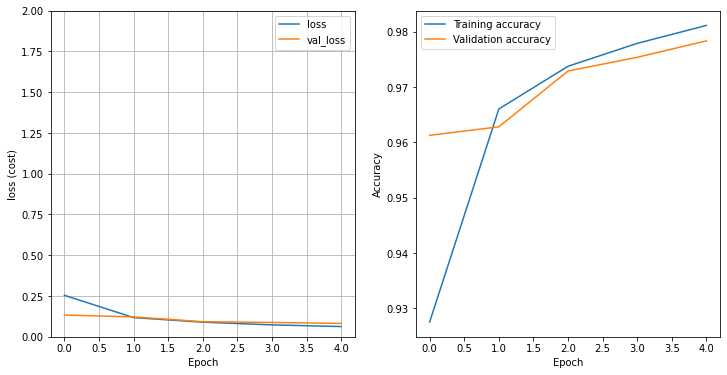

In [75]:
plot_loss_tf(history)

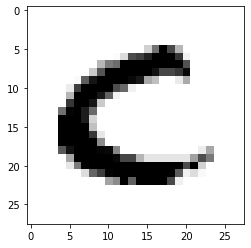

1/1 [==============================] - 0s 45ms/step
 Largest Prediction index: C
 Actual Label: C


In [76]:
def display_digit(X):
    x_reshaped = X.reshape((28,28))
    # Display the image
    plt.imshow(x_reshaped, cmap='binary')
    plt.show()

image = x_train[5785]
display_digit(image)

prediction = model.predict(image.reshape(1,784))

prediction_p = my_softmax(prediction.reshape(-1,))

y_cap = np.argmax(prediction_p)
print(f" Largest Prediction index: {labels[y_cap]}")
print(f" Actual Label: {labels[y_train[5785][0]]}")

In [77]:
## Testing the Model

results = model.evaluate(x_test, y_test, batch_size=128)
print(f"Training Accuracy: {history.history['sparse_categorical_accuracy'][-1]:.2f}")
print(f"Validation Accuracy: {history.history['val_sparse_categorical_accuracy'][-1]:.2f}")
print(f"Testing Accuracy: {results[1]:.2f}")

582/582 [==============================] - 1s 2ms/step - loss: 0.0799 - sparse_categorical_accuracy: 0.9779
Training Accuracy: 0.98
Validation Accuracy: 0.98
Testing Accuracy: 0.98


In [78]:
# Wrong predictions in training set

m = x_train.shape[0]
pred = []
incorrect_pred = []
for i in range(1000):
    prediction = model.predict(x_train[i].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    pred.append(yhat)
    if yhat != y_train[i][0]:
        incorrect_pred.append(i)
    

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 17ms/step


In [79]:
print(len(incorrect_pred))
model.save("my_model.h5")

19
